In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
fname_WT = '../../resources/run_workflow/results_cluster/wild_type/coverage_all.csv'
fname_OE = '../../resources/run_workflow/results_cluster/dicer_overexpression/coverage_all.csv'
fname_KO = '../../resources/run_workflow/results_cluster/dicer_KO/coverage_all.csv'
fname_parental = '../../resources/run_workflow/results_cluster/parental_stock_ref_EBref/coverage_all.csv'

In [3]:
df_GTs = pd.concat([pd.read_csv(fname_WT), 
                    pd.read_csv(fname_OE), 
                    pd.read_csv(fname_KO)],
                   ignore_index=True)
df_GTs['pos_in_EB_ref'] = df_GTs['pos'] + 25

df_p0 = pd.read_csv(fname_parental)
df_p0['pos_in_EB_ref'] = df_p0['pos']

In [4]:
df_coverage = pd.concat([df_p0, df_GTs], ignore_index=True)

In [5]:
mean = df_coverage['coverage'].mean(axis=0)
mean

127542.52379892227

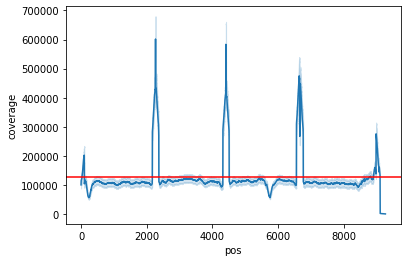

In [6]:
g = sns.lineplot(data=df_coverage, 
                 x = "pos", 
                 y="coverage")

g.axhline(y = mean,xmin=0,xmax=9288, color='red')


In [7]:
g.get_figure().savefig("000__Manuscript_figures/Supplement_Figure_1__coverage.pdf")